![Uploading abigail-keenan-8-s5QuUBtyM-unsplash.jpg]()


# Objective

**Analyze the factors influencing fan engagement during international football matches and identify patterns and trends that drive higher fan engagement.**

# DATA PREPARATION

In [1]:
# Import neccessary Modules
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading CSV files
goal_scorers = pd.read_csv('goalscorers.csv')
results = pd.read_csv('results.csv')
shootouts = pd.read_csv('shootouts.csv')

In [3]:
# Summary of the Datasets
goal_scorers.info()
results.info()
shootouts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41008 entries, 0 to 41007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       41008 non-null  object 
 1   home_team  41008 non-null  object 
 2   away_team  41008 non-null  object 
 3   team       41008 non-null  object 
 4   scorer     40959 non-null  object 
 5   minute     40750 non-null  float64
 6   own_goal   41008 non-null  bool   
 7   penalty    41008 non-null  bool   
dtypes: bool(2), float64(1), object(5)
memory usage: 2.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44557 entries, 0 to 44556
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        44557 non-null  object
 1   home_team   44557 non-null  object
 2   away_team   44557 non-null  object
 3   home_score  44557 non-null  int64 
 4   away_score  44557 non-null  int64 
 5   tournament  44557 non-null  object
 6 

In [4]:
shootouts.head()

,date,home_team,away_team,winner
0,1967-08-22,India,Taiwan,Taiwan
1,1971-11-14,South Korea,Vietnam Republic,South Korea
2,1972-05-07,South Korea,Iraq,Iraq
3,1972-05-17,Thailand,South Korea,South Korea
4,1972-05-19,Thailand,Cambodia,Thailand


In [5]:
goal_scorers.head()

,date,home_team,away_team,team,scorer,minute,own_goal,penalty
0,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,44.0,False,False
1,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,55.0,False,False
2,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,70.0,False,False
3,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,75.0,False,False
4,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,2.0,False,False


In [6]:
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [7]:
#  Extracting the year column from the date column
results['year'] = pd.to_datetime(results['date']).dt.year
results['date'] = pd.to_datetime(results['date'],format='%Y-%m-%d')

# goal_scorers['year'] = pd.to_datetime(goal_scorers['date']).dt.year
goal_scorers['date'] = pd.to_datetime(goal_scorers['date'],format='%Y-%m-%d')

# shootouts['year'] = pd.to_datetime(shootouts['date']).dt.year
shootouts['date'] = pd.to_datetime(shootouts['date'],format='%Y-%m-%d')

In [8]:
results.info()
goal_scorers.info()
shootouts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44557 entries, 0 to 44556
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        44557 non-null  datetime64[ns]
 1   home_team   44557 non-null  object        
 2   away_team   44557 non-null  object        
 3   home_score  44557 non-null  int64         
 4   away_score  44557 non-null  int64         
 5   tournament  44557 non-null  object        
 6   city        44557 non-null  object        
 7   country     44557 non-null  object        
 8   neutral     44557 non-null  bool          
 9   year        44557 non-null  int64         
dtypes: bool(1), datetime64[ns](1), int64(3), object(5)
memory usage: 3.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41008 entries, 0 to 41007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       41008 non-null  dat

In [9]:
# Changing the Datatypes of the columns to the correct one
results['home_score'] = results['home_score'].astype(int)
results['away_score'] = results['away_score'].astype(int)

In [10]:
results.describe()

,home_score,away_score,year
count,44557.000000,44557.000000,44557.000000
mean,1.739278,1.178401,1992.095787
std,1.747263,1.393775,24.623020
min,0.000000,0.000000,1872.000000
25%,1.000000,0.000000,1979.000000
50%,1.000000,1.000000,1999.000000
75%,2.000000,2.000000,2011.000000
max,31.000000,21.000000,2023.000000


In [11]:
# Number of Missing values in each dataset
goal_scorers.isna().sum()

date           0
home_team      0
away_team      0
team           0
scorer        49
minute       258
own_goal       0
penalty        0
dtype: int64

In [12]:
# Overview of the missing values in the Goal_Scorers Dataframe
missing_rows = goal_scorers[goal_scorers.isnull().any(axis=1)].sort_values('date')
missing_rows.head(300)

,date,home_team,away_team,team,scorer,minute,own_goal,penalty
3011,1960-10-16,Taiwan,Vietnam Republic,Taiwan,Yiu Cheuk Yin,NaN,False,False
3647,1963-11-26,Ghana,Ethiopia,Ghana,Edward Acquah,NaN,False,False
3648,1963-11-26,Ghana,Ethiopia,Ghana,Edward Acquah,NaN,False,False
3651,1963-11-28,Ethiopia,Tunisia,Ethiopia,Mengistu Worku,NaN,False,False
3652,1963-11-28,Ethiopia,Tunisia,Ethiopia,Mengistu Worku,NaN,False,False
...,...,...,...,...,...,...,...,...
15967,1997-03-27,Saudi Arabia,Bangladesh,Saudi Arabia,Obeid Al-Dosari,NaN,False,False
15995,1997-03-29,Taiwan,Bangladesh,Bangladesh,Alfaz Ahmed,NaN,False,False
15996,1997-03-29,Taiwan,Bangladesh,Bangladesh,Imtiaz Ahmed Nakib,NaN,False,False
15994,1997-03-29,Taiwan,Bangladesh,Taiwan,Hsu Te Ming,NaN,False,False


In [13]:
# Dropping Missing value rows
goal_scorers = goal_scorers.dropna(subset=['minute','scorer'])

goal_scorers.isna().sum()

date         0
home_team    0
away_team    0
team         0
scorer       0
minute       0
own_goal     0
penalty      0
dtype: int64

In [14]:
results.isna().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
year          0
dtype: int64

In [15]:
shootouts.isna().sum()

date         0
home_team    0
away_team    0
winner       0
dtype: int64

In [16]:
# Merging the DataFrames
# df = results.merge(goal_scorers, on=['date','home_team','away_team'],how='inner',suffixes=('_result','_goal')).merge(shootouts,on=['date','home_team','away_team'],how='left')
# df.head()

In [17]:
df = pd.merge(results,shootouts,on=['date','home_team','away_team'],how='left',suffixes=('_res','_goal'))
df = pd.merge(df,goal_scorers,on=['date','home_team','away_team'],how='inner')

In [18]:
# df['home_result'] = ''
# df.loc[df['home_score'] > df['away_score'], 'result'] = 'win'
# df.loc[df['home_score'] < df['away_score'], 'result'] = 'loss'
# df.loc[df['home_score'] == df['away_score'], 'result'] = 'draw'

In [19]:
df['home_outcome'] = ''
df['away_outcome'] = ''
df.loc[df['home_score'] > df['away_score'], 'home_outcome'] = 'win'
df.loc[df['home_score'] < df['away_score'], 'home_outcome'] = 'loss'
df.loc[df['home_score'] == df['away_score'], 'home_outcome'] = 'draw'
df.loc[df['home_score'] > df['away_score'], 'away_outcome'] = 'loss'
df.loc[df['home_score'] < df['away_score'], 'away_outcome'] = 'win'
df.loc[df['home_score'] == df['away_score'], 'away_outcome'] = 'draw'


In [20]:
df.head(1000)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,winner,team,scorer,minute,own_goal,penalty,home_outcome,away_outcome
0,1916-07-02,Chile,Uruguay,0,4,Copa América,Buenos Aires,Argentina,True,1916,NaN,Uruguay,José Piendibene,44.0,False,False,loss,win
1,1916-07-02,Chile,Uruguay,0,4,Copa América,Buenos Aires,Argentina,True,1916,NaN,Uruguay,Isabelino Gradín,55.0,False,False,loss,win
2,1916-07-02,Chile,Uruguay,0,4,Copa América,Buenos Aires,Argentina,True,1916,NaN,Uruguay,Isabelino Gradín,70.0,False,False,loss,win
3,1916-07-02,Chile,Uruguay,0,4,Copa América,Buenos Aires,Argentina,True,1916,NaN,Uruguay,José Piendibene,75.0,False,False,loss,win
4,1916-07-06,Argentina,Chile,6,1,Copa América,Buenos Aires,Argentina,False,1916,NaN,Argentina,Alberto Ohaco,2.0,False,False,win,loss
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1942-02-05,Brazil,Paraguay,1,1,Copa América,Montevideo,Uruguay,True,1942,NaN,Paraguay,Fabio Baudo Franco,23.0,False,False,draw,draw
996,1942-02-05,Chile,Ecuador,2,1,Copa América,Montevideo,Uruguay,True,1942,NaN,Ecuador,Marino Alcívar,5.0,False,False,win,loss
997,1942-02-05,Chile,Ecuador,2,1,Copa América,Montevideo,Uruguay,True,1942,NaN,Chile,Alfonso Domínguez,20.0,False,False,win,loss
998,1942-02-05,Chile,Ecuador,2,1,Copa América,Montevideo,Uruguay,True,1942,NaN,Chile,Benito Armingol,42.0,False,False,win,loss


In [21]:
df.shape

(40750, 18)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40750 entries, 0 to 40749
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          40750 non-null  datetime64[ns]
 1   home_team     40750 non-null  object        
 2   away_team     40750 non-null  object        
 3   home_score    40750 non-null  int64         
 4   away_score    40750 non-null  int64         
 5   tournament    40750 non-null  object        
 6   city          40750 non-null  object        
 7   country       40750 non-null  object        
 8   neutral       40750 non-null  bool          
 9   year          40750 non-null  int64         
 10  winner        321 non-null    object        
 11  team          40750 non-null  object        
 12  scorer        40750 non-null  object        
 13  minute        40750 non-null  float64       
 14  own_goal      40750 non-null  bool          
 15  penalty       40750 non-null  bool  

In [23]:
df.describe()

,home_score,away_score,year,minute
count,40750.000000,40750.000000,40750.000000,40750.000000
mean,2.639436,1.582503,1996.310552,50.019166
std,2.460591,1.712180,20.659277,26.360859
min,0.000000,0.000000,1916.000000,1.000000
25%,1.000000,0.000000,1986.000000,28.000000
50%,2.000000,1.000000,2001.000000,51.000000
75%,4.000000,2.000000,2012.000000,73.000000
max,31.000000,17.000000,2022.000000,122.000000


# EXPLORATORY DATA ANALYSIS

In [24]:
# Subsetting the data to contain range from 2000-2023
subset = df[df['year'] >= 2000]

In [25]:
subset.head(500)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,winner,team,scorer,minute,own_goal,penalty,home_outcome,away_outcome
18088,2000-01-22,Ghana,Cameroon,1,1,African Cup of Nations,Accra,Ghana,False,2000,NaN,Cameroon,Marc-Vivien Foé,19.0,False,False,draw,draw
18089,2000-01-22,Ghana,Cameroon,1,1,African Cup of Nations,Accra,Ghana,False,2000,NaN,Ghana,Kwame Ayew,57.0,False,False,draw,draw
18090,2000-01-23,Egypt,Zambia,2,0,African Cup of Nations,Kano,Nigeria,True,2000,NaN,Egypt,Yasser Radwan,37.0,False,False,win,loss
18091,2000-01-23,Egypt,Zambia,2,0,African Cup of Nations,Kano,Nigeria,True,2000,NaN,Egypt,Hossam Hassan,50.0,False,False,win,loss
18092,2000-01-23,Nigeria,Tunisia,4,2,African Cup of Nations,Lagos,Nigeria,False,2000,NaN,Nigeria,Jay-Jay Okocha,28.0,False,False,win,loss
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18583,2000-06-13,Serbia,Slovenia,3,3,UEFA Euro,Charleroi,Belgium,True,2000,NaN,Slovenia,Miran Pavlin,52.0,False,False,draw,draw
18584,2000-06-13,Serbia,Slovenia,3,3,UEFA Euro,Charleroi,Belgium,True,2000,NaN,Slovenia,Zlatko Zahovič,57.0,False,False,draw,draw
18585,2000-06-13,Serbia,Slovenia,3,3,UEFA Euro,Charleroi,Belgium,True,2000,NaN,Serbia,Savo Milošević,67.0,False,False,draw,draw
18586,2000-06-13,Serbia,Slovenia,3,3,UEFA Euro,Charleroi,Belgium,True,2000,NaN,Serbia,Ljubinko Drulović,70.0,False,False,draw,draw


In [26]:
subset.shape

(22662, 18)

In [27]:
subset.describe()

,home_score,away_score,year,minute
count,22662.000000,22662.000000,22662.000000,22662.000000
mean,2.579914,1.556350,2010.611199,51.008163
std,2.629840,1.685548,6.746794,26.474668
min,0.000000,0.000000,2000.000000,1.000000
25%,1.000000,0.000000,2004.000000,29.000000
50%,2.000000,1.000000,2011.000000,52.000000
75%,3.000000,2.000000,2016.000000,74.000000
max,31.000000,13.000000,2022.000000,120.000000


Distribution of Matches accross tournaments, countries, cities

Text(0.5, 1.0, 'Distribution of Matches accross Tournaments')

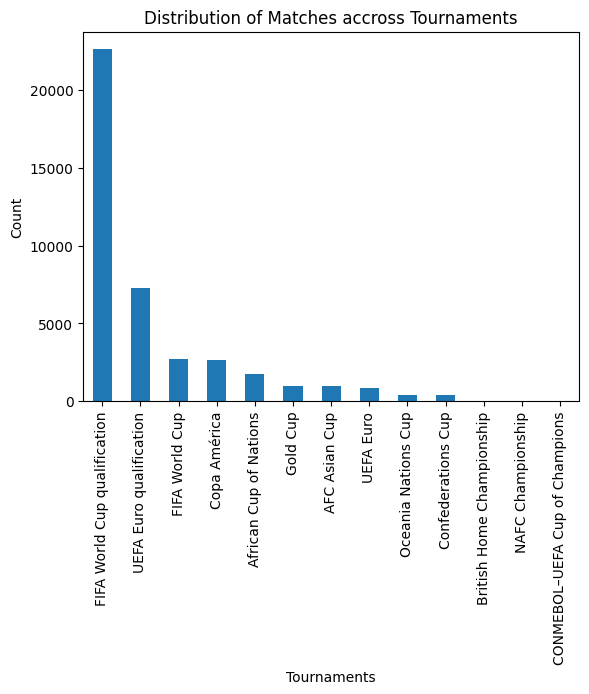

In [28]:
# Distribution of tournaments
df['tournament'].value_counts().plot(kind='bar')
plt.xlabel('Tournaments')
plt.ylabel('Count')
plt.title('Distribution of Matches accross Tournaments')

Text(0.5, 1.0, 'Top Countries by Number of Matches Played in Popular Tournaments from 2000-2023')

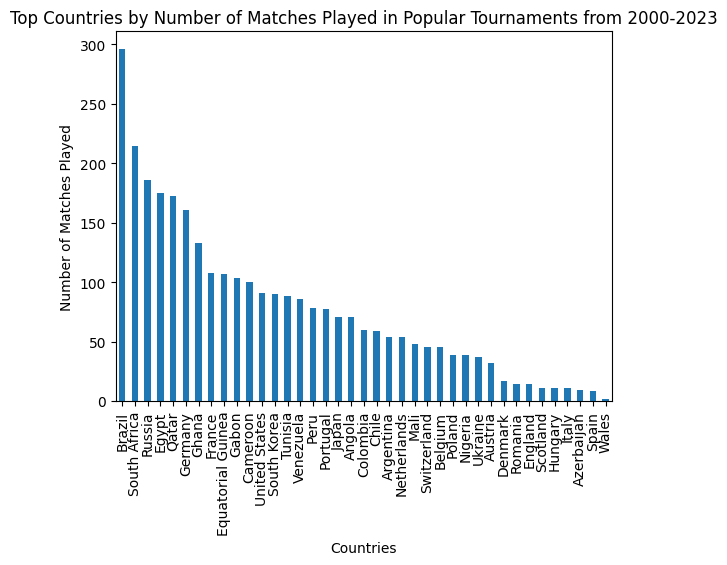

In [29]:
# Distribution of Countries
subset[subset['tournament'].isin(['FIFA World Cup','African Cup of Nations','Copa América','UEFA Euro'])]['country'].value_counts().plot(kind='bar')
plt.xlabel('Countries')
plt.ylabel('Number of Matches Played')
plt.title('Top Countries by Number of Matches Played in Popular Tournaments from 2000-2023')

Text(0.5, 1.0, 'Top Cities by Number of Men’s FIFA World Cup Matches Played from 2000-2023')

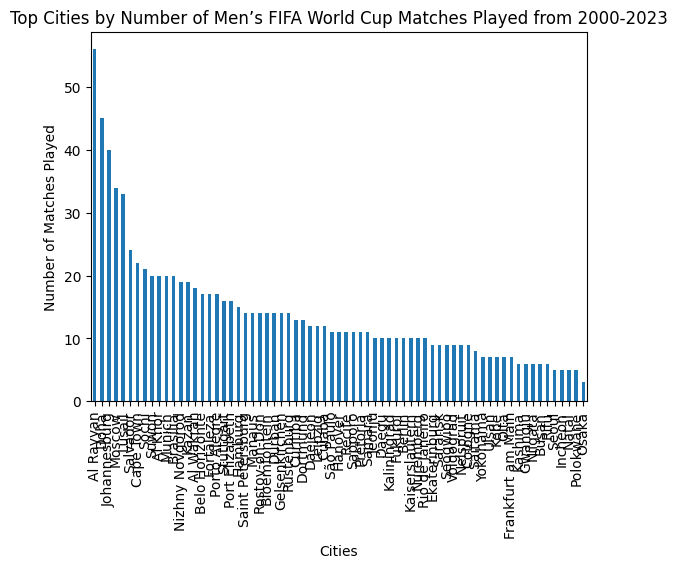

In [30]:
# Distribution of Cities
subset[subset['tournament'].isin(['FIFA World Cup'])]['city'].value_counts().plot(kind='bar')
plt.xlabel('Cities')
plt.ylabel('Number of Matches Played')
plt.title('Top Cities by Number of Men’s FIFA World Cup Matches Played from 2000-2023')

Text(0.5, 1.0, 'Top Cities by Number of Africa Cup of Nations Matches Played from 2000-2023')

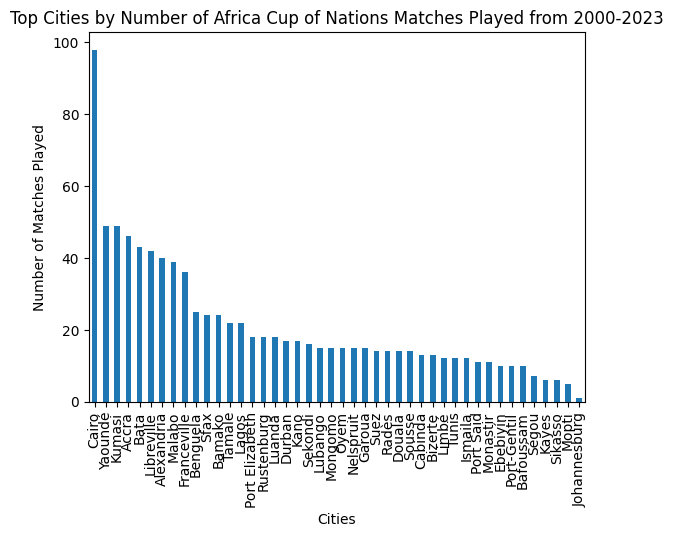

In [31]:
# Distribution of Cities
subset[subset['tournament'].isin(['African Cup of Nations'])]['city'].value_counts().plot(kind='bar')
plt.xlabel('Cities')
plt.ylabel('Number of Matches Played')
plt.title('Top Cities by Number of Africa Cup of Nations Matches Played from 2000-2023')

**The Frequency and trends of international matches over time**

In [32]:
# Calculating match Frequencies
match_frequencies = subset.groupby('year').size()
print(match_frequencies)

year
2000    1140
2001    1731
2002     469
2003     710
2004    1655
2005    1075
2006     507
2007    1024
2008    1302
2009     965
2010     467
2011    1328
2012     858
2013    1126
2014     435
2015    1511
2016     996
2017     985
2018     169
2019    1559
2020      97
2021    2051
2022     502
dtype: int64


### Analyzing the Frequency of International Matches over time

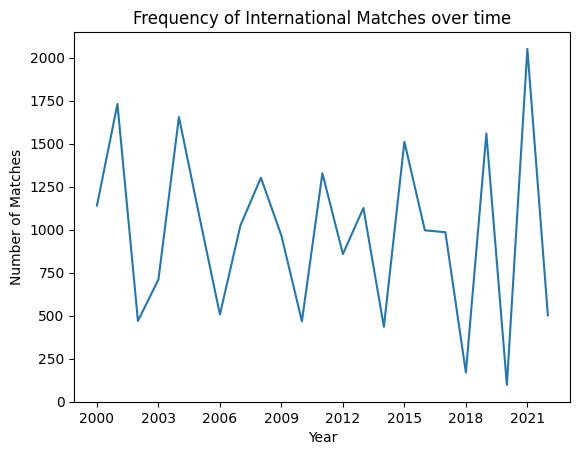

In [33]:
# Plotting Match Frequences over time
match_frequencies.plot(kind='line',xticks = range(2000,2023,3))
plt.xlabel('Year')
plt.ylabel('Number of Matches')
plt.title('Frequency of International Matches over time')
plt.show()

In [34]:
subset[(subset['tournament'].isin(['Copa América','African Cup of Nations','UEFA Nations League'])) & (subset['year'] == 2007)]

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,winner,team,scorer,minute,own_goal,penalty,home_outcome,away_outcome
25630,2007-06-26,Uruguay,Peru,0,3,Copa América,Mérida,Venezuela,True,2007,NaN,Peru,Miguel Villalta,27.0,False,False,loss,win
25631,2007-06-26,Uruguay,Peru,0,3,Copa América,Mérida,Venezuela,True,2007,NaN,Peru,Juan Carlos Mariño,70.0,False,False,loss,win
25632,2007-06-26,Uruguay,Peru,0,3,Copa América,Mérida,Venezuela,True,2007,NaN,Peru,Paolo Guerrero,88.0,False,False,loss,win
25633,2007-06-26,Venezuela,Bolivia,2,2,Copa América,San Cristóbal,Venezuela,False,2007,NaN,Venezuela,Giancarlo Maldonado,20.0,False,False,draw,draw
25634,2007-06-26,Venezuela,Bolivia,2,2,Copa América,San Cristóbal,Venezuela,False,2007,NaN,Bolivia,Jaime Moreno,38.0,False,False,draw,draw
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25753,2007-07-14,Mexico,Uruguay,3,1,Copa América,Caracas,Venezuela,True,2007,NaN,Mexico,Omar Bravo,68.0,False,False,win,loss
25754,2007-07-14,Mexico,Uruguay,3,1,Copa América,Caracas,Venezuela,True,2007,NaN,Mexico,Andrés Guardado,76.0,False,False,win,loss
25758,2007-07-15,Brazil,Argentina,3,0,Copa América,Maracaibo,Venezuela,True,2007,NaN,Brazil,Júlio Baptista,4.0,False,False,win,loss
25759,2007-07-15,Brazil,Argentina,3,0,Copa América,Maracaibo,Venezuela,True,2007,NaN,Brazil,Roberto Ayala,40.0,True,False,win,loss


In [35]:
subset[(subset['tournament'].isin(['FIFA World Cup','African Cup of Nations'])) & (subset['year'] == 2010)]

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,winner,team,scorer,minute,own_goal,penalty,home_outcome,away_outcome
28666,2010-01-10,Angola,Mali,4,4,African Cup of Nations,Luanda,Angola,False,2010,NaN,Angola,Flávio Amado,36.0,False,False,draw,draw
28667,2010-01-10,Angola,Mali,4,4,African Cup of Nations,Luanda,Angola,False,2010,NaN,Angola,Flávio Amado,42.0,False,False,draw,draw
28668,2010-01-10,Angola,Mali,4,4,African Cup of Nations,Luanda,Angola,False,2010,NaN,Angola,Sebastião Gilberto,67.0,False,True,draw,draw
28669,2010-01-10,Angola,Mali,4,4,African Cup of Nations,Luanda,Angola,False,2010,NaN,Angola,Manucho,74.0,False,True,draw,draw
28670,2010-01-10,Angola,Mali,4,4,African Cup of Nations,Luanda,Angola,False,2010,NaN,Mali,Seydou Keita,79.0,False,False,draw,draw
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28877,2010-07-10,Uruguay,Germany,2,3,FIFA World Cup,Port Elizabeth,South Africa,True,2010,NaN,Uruguay,Edinson Cavani,28.0,False,False,loss,win
28878,2010-07-10,Uruguay,Germany,2,3,FIFA World Cup,Port Elizabeth,South Africa,True,2010,NaN,Uruguay,Diego Forlán,51.0,False,False,loss,win
28879,2010-07-10,Uruguay,Germany,2,3,FIFA World Cup,Port Elizabeth,South Africa,True,2010,NaN,Germany,Marcell Jansen,56.0,False,False,loss,win
28880,2010-07-10,Uruguay,Germany,2,3,FIFA World Cup,Port Elizabeth,South Africa,True,2010,NaN,Germany,Sami Khedira,82.0,False,False,loss,win


### **Investigating the impact of Neutral Venue on Match Scores**

In [36]:
neutral = subset[subset['neutral'] == True]

In [37]:
non_neutral = subset[subset['neutral'] == False]

<AxesSubplot: >

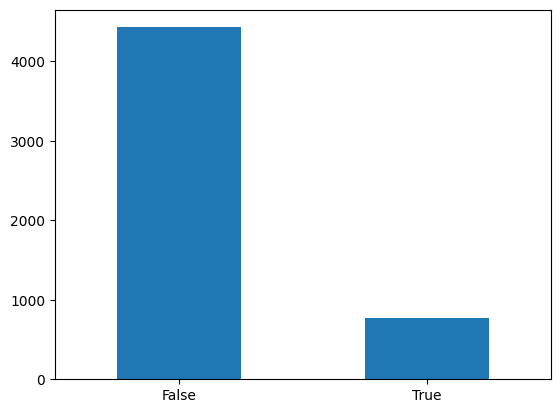

In [38]:
# What is the number of distributions based on whether the venue is a neutral ground?
neutral_draw_count = neutral['home_score'] == neutral['away_score']
draw_counts = neutral_draw_count.value_counts()
neutral_draw_count.value_counts().plot(kind='bar',rot=0)

In [39]:
# Percentage of Matches that ends in a draw
draw_percentage = (draw_counts[True] / len(neutral_draw_count)) * 100
print(draw_percentage)

14.917339484813533


In [40]:
# Percentage of Matches that did not end in a draw
non_draw_percentage = (draw_counts[False] / len(neutral_draw_count)) * 100
print(non_draw_percentage)

85.08266051518648


<AxesSubplot: >

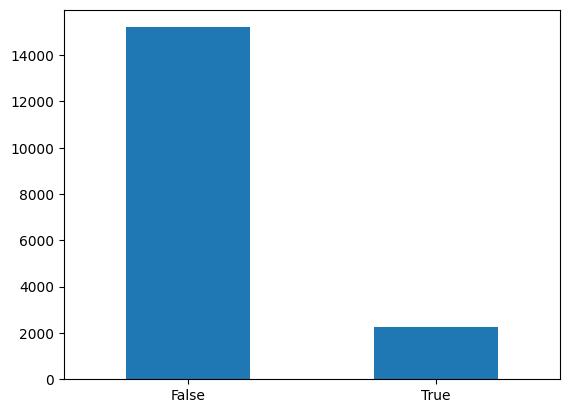

In [41]:
# What is the number of distributions based on whether the venue is a non neutral ground?
non_neutral_draw_count = non_neutral['home_score'] == non_neutral['away_score']
n_draw_counts = non_neutral_draw_count.value_counts()
non_neutral_draw_count.value_counts().plot(kind='bar',rot=0)

In [42]:
# Percentage of Matches that ends in a draw in a non neutral ground
n_draw_percentage = (n_draw_counts[True] / len(non_neutral_draw_count)) * 100
print(n_draw_percentage)

12.943871706758307


In [43]:
# Percentage of Matches that did not end in a draw in a non neutral ground
nn_draw_percentage = (n_draw_counts[False] / len(non_neutral_draw_count)) * 100
print(nn_draw_percentage)

87.0561282932417


In [44]:
# Neutral Venue Margin of Victory
neutral_margin_of_victory = neutral['home_score'] - neutral['away_score']

neutral_average_margin_of_victory = neutral_margin_of_victory.mean()
neutral_sum_margin_of_victory = neutral_margin_of_victory.sum()

print(neutral_average_margin_of_victory)
print(neutral_sum_margin_of_victory)

0.3225682429834679
1678


In [45]:
# Non Neutral venue margin of victory
non_neutral_margin_of_victory = non_neutral['home_score'] - non_neutral['away_score']
non_neutral_average_margin_of_victory = non_neutral_margin_of_victory.mean()
non_neutral_sum_margin_of_victory = non_neutral_margin_of_victory.sum()
print(non_neutral_average_margin_of_victory)
print(non_neutral_sum_margin_of_victory)

non_neutral_margin_of_victory.max()

1.2324169530355098
21518


31

### Distribution of Goals Scored by a Home or Away team in a Neutral or Non Neutral Venue

Text(0.5, 1.0, 'Distribution of goals scored by the home team in a Non Neutral Ground')

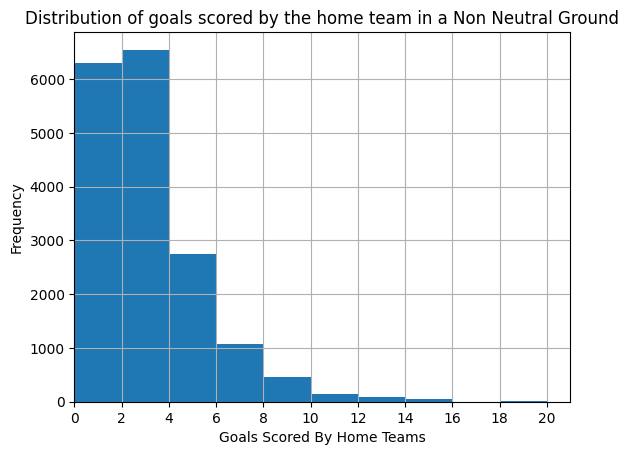

In [46]:
# Distribution of Non Neutral Home Matches
bin_edges = np.arange(0,21,2)
non_neutral['home_score'].hist(bins=bin_edges)
plt.xticks(bin_edges)
plt.xlim(left=0)
plt.xlabel('Goals Scored By Home Teams')
plt.ylabel('Frequency')
plt.title('Distribution of goals scored by the home team in a Non Neutral Ground')

Text(0.5, 1.0, 'Distribution of goals scored by the away team in a Non Neutral Ground')

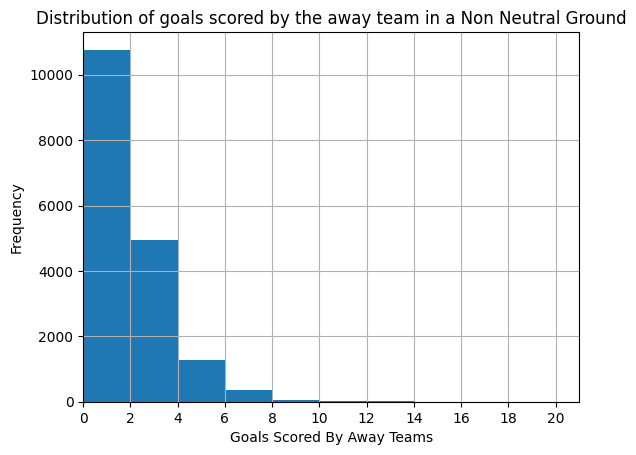

In [47]:
# Distribution of Non Neutral Away Matches
bin_edges = np.arange(0,21,2)
non_neutral['away_score'].hist(bins=bin_edges)
plt.xticks(bin_edges)
plt.xlim(left=0)
plt.xlabel('Goals Scored By Away Teams')
plt.ylabel('Frequency')
plt.title('Distribution of goals scored by the away team in a Non Neutral Ground')

Text(0.5, 1.0, 'Distribution of goals scored by the home team in a Neutral Ground')

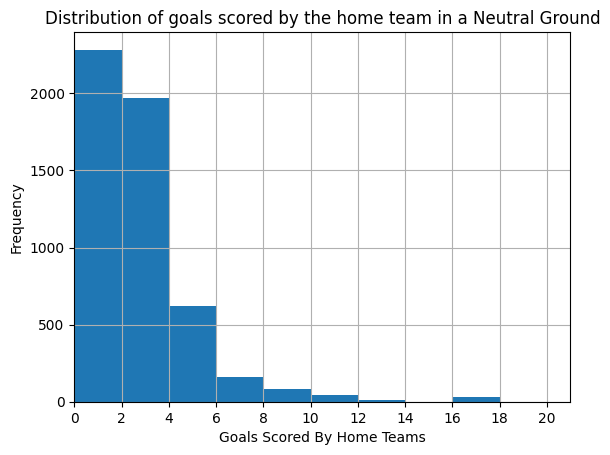

In [48]:
# 
bin_edges = np.arange(0,21,2)
neutral['home_score'].hist(bins=bin_edges)
plt.xticks(bin_edges)
plt.xlim(left=0)
plt.xlabel('Goals Scored By Home Teams')
plt.ylabel('Frequency')
plt.title('Distribution of goals scored by the home team in a Neutral Ground')

Text(0.5, 1.0, 'Distribution of goals scored by the away team in a Neutral Ground')

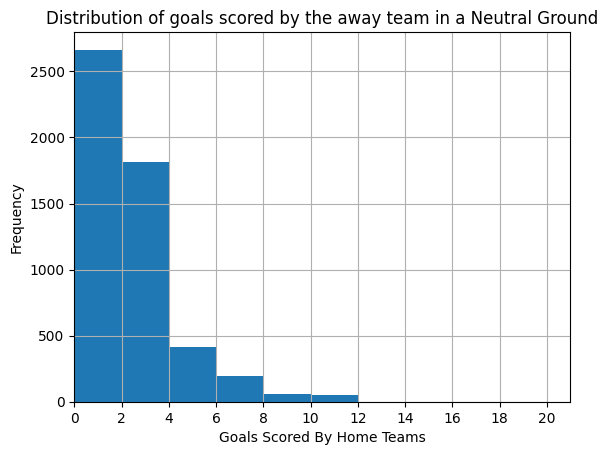

In [49]:
# 
bin_edges = np.arange(0,21,2)
neutral['away_score'].hist(bins=bin_edges)
plt.xticks(bin_edges)
plt.xlim(left=0)
plt.xlabel('Goals Scored By Home Teams')
plt.ylabel('Frequency')
plt.title('Distribution of goals scored by the away team in a Neutral Ground')

## Team Performance Analysis

### Highest number of wins, loss or draw by a team

In [50]:

# subset['home_outcome'].value_counts() subset['away_outcome'].value_counts()

In [51]:
# Number of wins by a Home Team
home_team_wins = subset[subset['home_outcome']=='win']['home_team'].value_counts()

# Number of loss by a home team
home_team_loss = subset[subset['home_outcome']=='loss']['home_team'].value_counts()

# Number of draws by a home team
home_team_draw = subset[subset['home_outcome']=='draw']['home_team'].value_counts()

In [52]:
home_team_wins.head()

United States    295
Australia        278
Brazil           268
Germany          260
Mexico           260
Name: home_team, dtype: int64

In [53]:
home_team_loss.head()

San Marino       217
Andorra          161
Malta            141
Luxembourg       137
Liechtenstein    128
Name: home_team, dtype: int64

In [54]:
home_team_draw.head()

Peru         56
Uruguay      50
Serbia       46
Argentina    46
Portugal     46
Name: home_team, dtype: int64

In [55]:
# Number of wins by a Away Team
away_team_wins = subset[subset['away_outcome']=='win']['away_team'].value_counts()

# Number of loss by a Away team
away_team_loss = subset[subset['away_outcome']=='loss']['away_team'].value_counts()

# Number of draws by a Away team
away_team_draw = subset[subset['away_outcome']=='draw']['away_team'].value_counts()

In [56]:
away_team_wins.head()

Germany     199
Spain       169
England     158
Mexico      144
Portugal    134
Name: away_team, dtype: int64

In [57]:
away_team_loss.head()

San Marino       290
Bolivia          194
Andorra          187
Faroe Islands    172
Liechtenstein    171
Name: away_team, dtype: int64

In [58]:
away_team_draw.head()

Argentina    50
Uruguay      46
Paraguay     46
Mexico       42
Senegal      42
Name: away_team, dtype: int64

In [59]:
# Number of total wins by a Home Team
total_team_wins = home_team_wins + away_team_wins
total_team_wins = total_team_wins.sort_values(ascending = False)

total_team_loss = home_team_loss + away_team_loss
total_team_loss = total_team_loss.sort_values(ascending = False)

total_team_draw = home_team_draw + away_team_draw
total_team_draw = total_team_draw.sort_values(ascending = False)

In [60]:
total_team_wins.head()

Germany        459.0
Mexico         404.0
Spain          396.0
Brazil         383.0
Netherlands    369.0
dtype: float64

In [61]:
total_team_loss.head()

San Marino       507.0
Andorra          348.0
Liechtenstein    299.0
Luxembourg       296.0
Malta            292.0
dtype: float64

In [62]:
total_team_draw.head()

Uruguay      96.0
Argentina    96.0
Portugal     86.0
Paraguay     84.0
Peru         84.0
dtype: float64

### Analyzing the performance of specific teams over time

In [63]:
ger = subset[((subset['home_team'] == 'Germany') & (subset['home_outcome'] == 'win')) | ((subset['away_team'] == 'Germany') & (subset['away_outcome'] == 'win'))]['year'].value_counts().sort_index(ascending=True)

In [64]:
ger.head()

2000     3
2001    16
2002    18
2003     8
2005    17
Name: year, dtype: int64

Text(0, 0.5, 'Frequency of Wins')

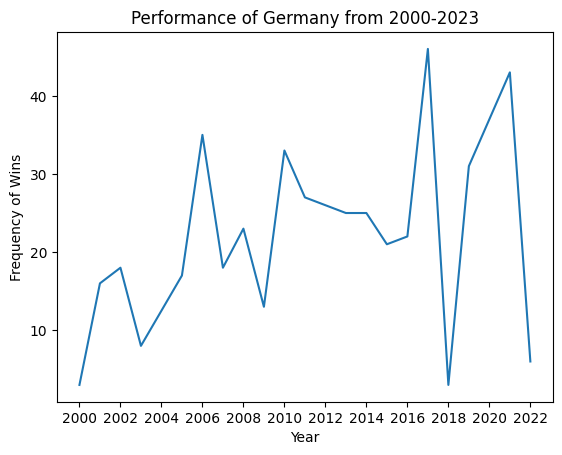

In [65]:
ger.plot(kind='line',xticks = range(2000,2023,2))
plt.title('Performance of Germany from 2000-2023')
plt.xlabel('Year')
plt.ylabel('Frequency of Wins')

In [66]:
nig = subset[((subset['home_team'] == 'Nigeria') & (subset['home_outcome'] == 'win')) | ((subset['away_team'] == 'Nigeria') & (subset['away_outcome'] == 'win'))]['year'].value_counts().sort_index(ascending=True)

Text(0, 0.5, 'Frequency of Wins')

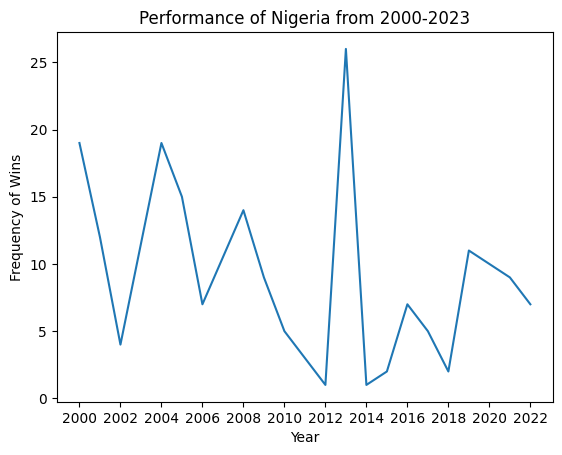

In [67]:
nig.plot(kind='line',xticks = range(2000,2023,2))
plt.title('Performance of Nigeria from 2000-2023')
plt.xlabel('Year')
plt.ylabel('Frequency of Wins')

In [68]:
mex = subset[((subset['home_team'] == 'Mexico') & (subset['home_outcome'] == 'win')) | ((subset['away_team'] == 'Mexico') & (subset['away_outcome'] == 'win'))]['year'].value_counts().sort_index(ascending=True)

Text(0, 0.5, 'Frequency of Wins')

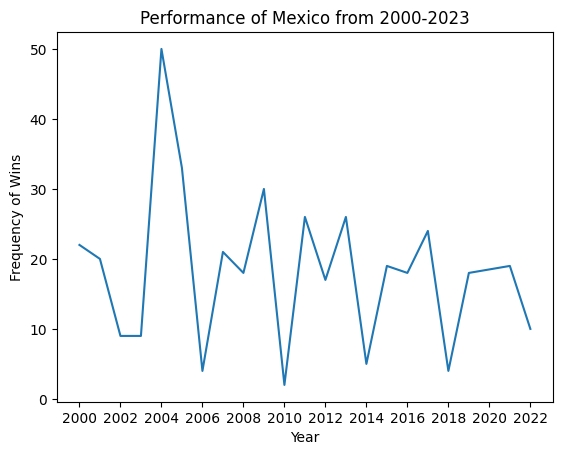

In [69]:
mex.plot(kind='line',xticks = range(2000,2023,2))
plt.title('Performance of Mexico from 2000-2023')
plt.xlabel('Year')
plt.ylabel('Frequency of Wins')

In [70]:
fra = subset[((subset['home_team'] == 'France') & (subset['home_outcome'] == 'win')) | ((subset['away_team'] == 'France') & (subset['away_outcome'] == 'win'))]['year'].value_counts().sort_index(ascending=True)

Text(0, 0.5, 'Frequency of Wins')

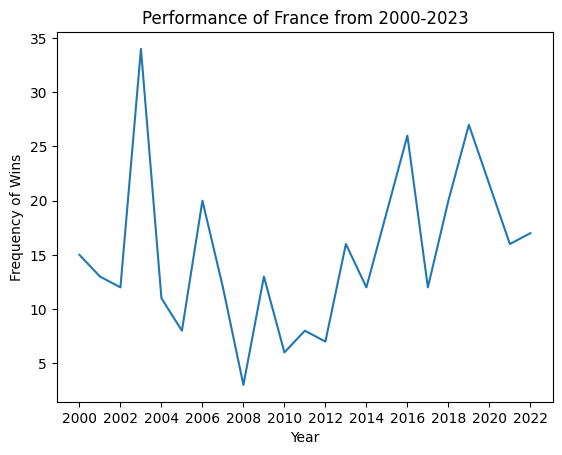

In [71]:
fra.plot(kind='line',xticks = range(2000,2023,2))
plt.title('Performance of France from 2000-2023')
plt.xlabel('Year')
plt.ylabel('Frequency of Wins')

### Success of Teams based on Match tournaments

In [72]:
subset['tournament'].unique()

array(['African Cup of Nations', 'Gold Cup',
       'FIFA World Cup qualification', 'UEFA Euro', 'Oceania Nations Cup',
       'AFC Asian Cup', 'Confederations Cup', 'Copa América',
       'FIFA World Cup', 'UEFA Euro qualification',
       'CONMEBOL–UEFA Cup of Champions'], dtype=object)

**Considering the top 5 teams with the highest wins**

In [73]:
ger_tournament = subset[((subset['home_team'] == 'Germany') & (subset['home_outcome'] == 'win')) | ((subset['away_team'] == 'Germany') & (subset['away_outcome'] == 'win'))]['tournament'].value_counts().sort_index(ascending=True)

<AxesSubplot: >

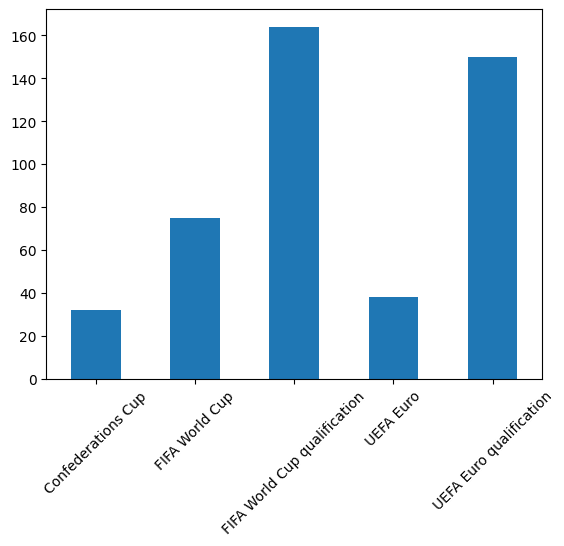

In [74]:
ger_tournament.plot(kind='bar',rot=45)

In [75]:
mex_tournament = subset[((subset['home_team'] == 'Mexico') & (subset['home_outcome'] == 'win')) | ((subset['away_team'] == 'Mexico') & (subset['away_outcome'] == 'win'))]['tournament'].value_counts().sort_index(ascending=True)

<AxesSubplot: >

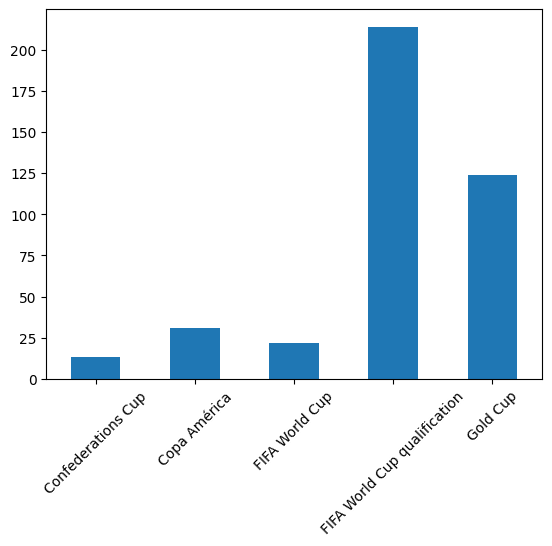

In [76]:
mex_tournament.plot(kind='bar',rot=45)

In [77]:
spa_tournament = subset[((subset['home_team'] == 'Spain') & (subset['home_outcome'] == 'win')) | ((subset['away_team'] == 'Spain') & (subset['away_outcome'] == 'win'))]['tournament'].value_counts().sort_index(ascending=True)

<AxesSubplot: >

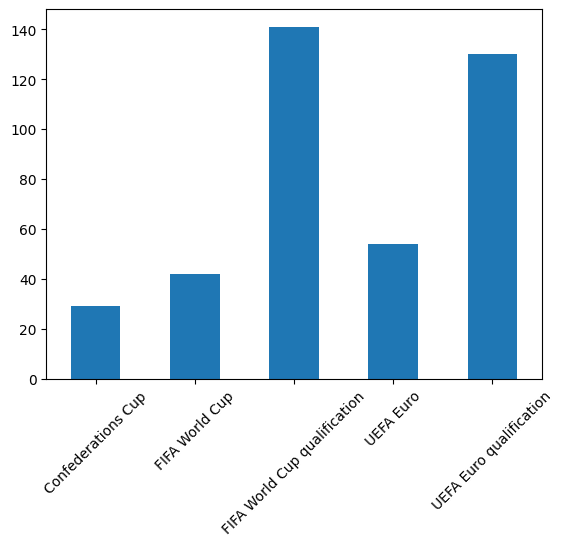

In [78]:
spa_tournament.plot(kind='bar',rot=45)

In [79]:
bra_tournament = subset[((subset['home_team'] == 'Brazil') & (subset['home_outcome'] == 'win')) | ((subset['away_team'] == 'Brazil') & (subset['away_outcome'] == 'win'))]['tournament'].value_counts().sort_index(ascending=True)

<AxesSubplot: >

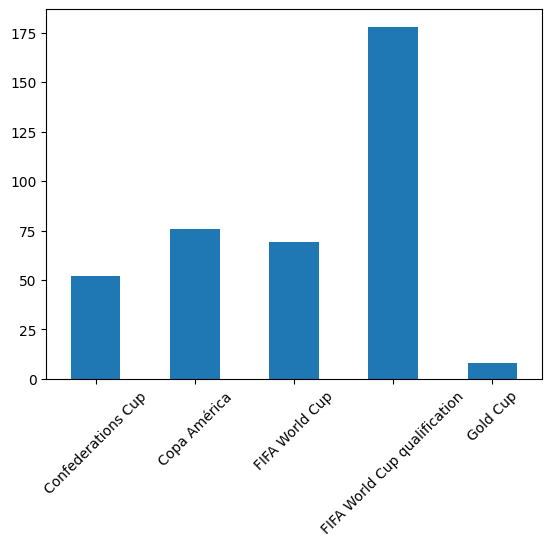

In [80]:
bra_tournament.plot(kind='bar',rot=45)

In [81]:
net_tournament = subset[((subset['home_team'] == 'Netherlands') & (subset['home_outcome'] == 'win')) | ((subset['away_team'] == 'Netherlands') & (subset['away_outcome'] == 'win'))]['tournament'].value_counts().sort_index(ascending=True)

<AxesSubplot: >

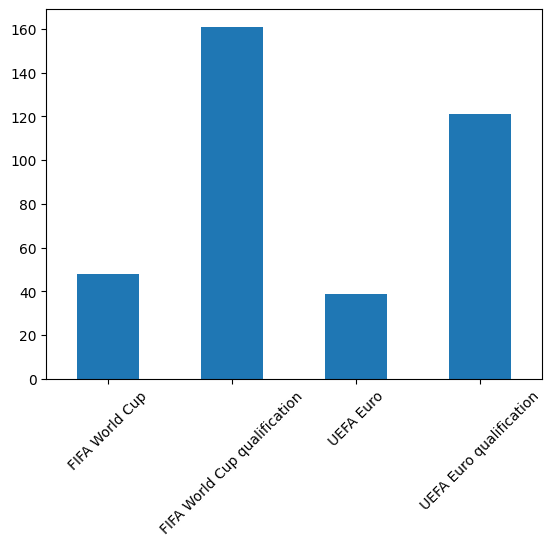

In [82]:
net_tournament.plot(kind='bar',rot=45)

In [83]:
alg_tournament = subset[((subset['home_team'] == 'Algeria') & (subset['home_outcome'] == 'win')) | ((subset['away_team'] == 'Algeria') & (subset['away_outcome'] == 'win'))]['tournament'].value_counts().sort_index(ascending=True)

<AxesSubplot: >

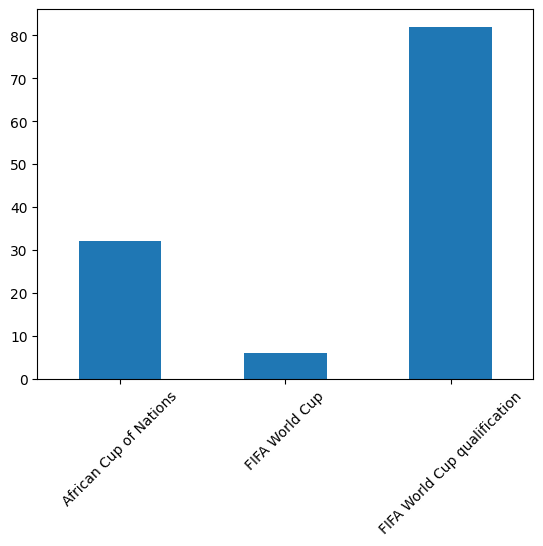

In [84]:
alg_tournament.plot(kind='bar',rot=45)

## Match Outcome Analysis

### The most common match outcomes (home win, away win, draw) across different tournaments

In [85]:
tournament_win = subset[(subset['home_outcome'] == 'win') | (subset['away_outcome'] == 'win')]['tournament'].value_counts().sort_index(ascending=True)

Text(0.5, 1.0, 'Number of Wins in a Tournament')

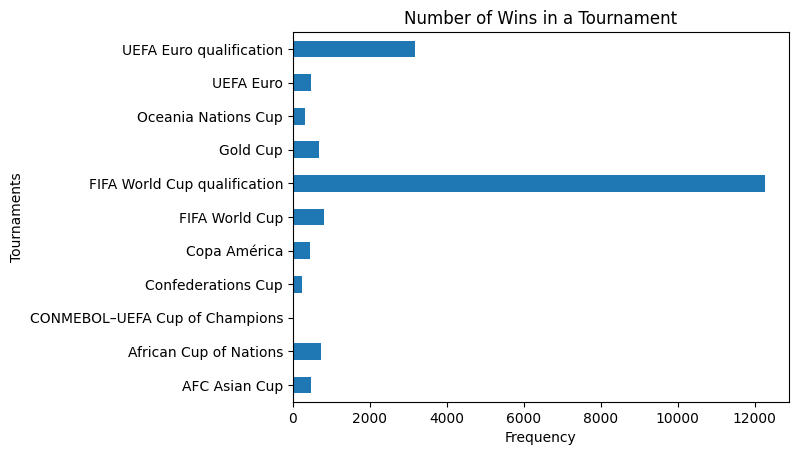

In [86]:
tournament_win.plot(kind='barh')
plt.ylabel('Tournaments')
plt.xlabel('Frequency')
plt.title('Number of Wins in a Tournament')

In [87]:
tournament_draw = subset[(subset['home_outcome'] == 'draw') | (subset['away_outcome'] == 'draw')]['tournament'].value_counts().sort_index(ascending=True)

Text(0.5, 1.0, 'Number of Draw in a Tournament')

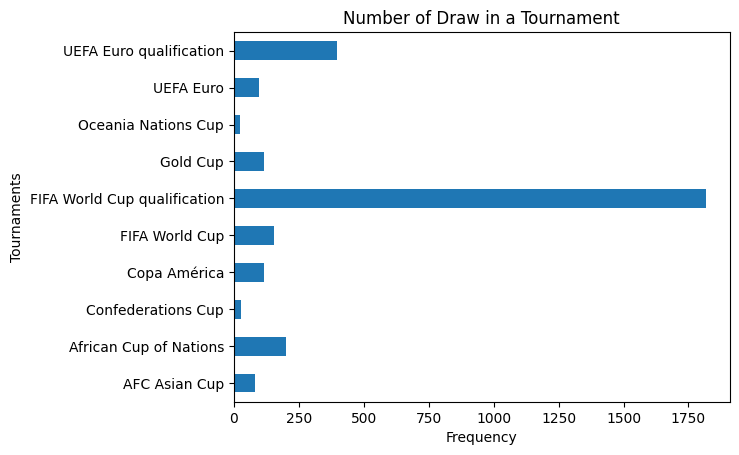

In [88]:
tournament_draw.plot(kind='barh')
plt.ylabel('Tournaments')
plt.xlabel('Frequency')
plt.title('Number of Draw in a Tournament')

In [89]:
tournament_loss = subset[(subset['home_outcome'] == 'loss') | (subset['away_outcome'] == 'loss')]['tournament'].value_counts().sort_index(ascending=True)

Text(0.5, 1.0, 'Number of Loss in a Tournament')

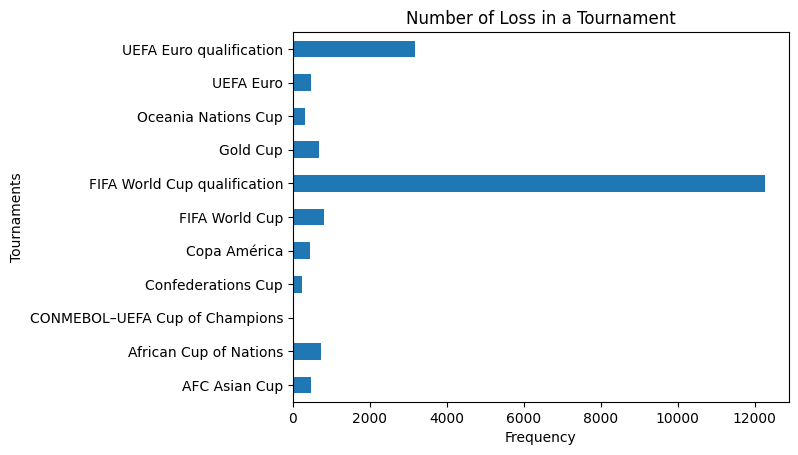

In [90]:
tournament_loss.plot(kind='barh')
plt.ylabel('Tournaments')
plt.xlabel('Frequency')
plt.title('Number of Loss in a Tournament')

### Trends or patterns in match outcomes over time.

In [91]:
year_win = subset[(subset['home_outcome'] == 'win') | (subset['away_outcome'] == 'win')]['year'].value_counts().sort_index(ascending=True)

Text(0, 0.5, 'Frequency')

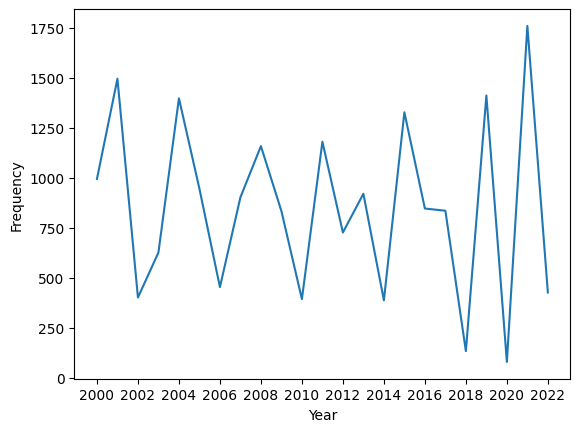

In [92]:
year_win.plot(kind='line',xticks = range(2000,2023,2))
plt.xlabel('Year')
plt.ylabel('Frequency')

In [93]:
year_draw = subset[(subset['home_outcome'] == 'draw') | (subset['away_outcome'] == 'draw')]['year'].value_counts().sort_index(ascending=True)

Text(0, 0.5, 'Frequency')

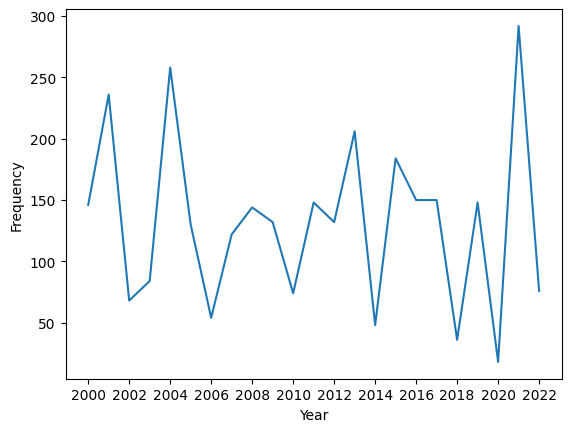

In [94]:
year_draw.plot(kind='line',xticks = range(2000,2023,2))
plt.xlabel('Year')
plt.ylabel('Frequency')

### Frequency of high-scoring matches or matches with penalty shootouts

In [95]:
subset[~subset['winner'].isnull()]

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,winner,team,scorer,minute,own_goal,penalty,home_outcome,away_outcome
18154,2000-02-12,South Africa,Tunisia,2,2,African Cup of Nations,Accra,Ghana,True,2000,South Africa,South Africa,Shaun Bartlett,11.0,False,False,draw,draw
18155,2000-02-12,South Africa,Tunisia,2,2,African Cup of Nations,Accra,Ghana,True,2000,South Africa,Tunisia,Ali Zitouni,27.0,False,False,draw,draw
18156,2000-02-12,South Africa,Tunisia,2,2,African Cup of Nations,Accra,Ghana,True,2000,South Africa,South Africa,Siyabonga Nomvethe,62.0,False,False,draw,draw
18157,2000-02-12,South Africa,Tunisia,2,2,African Cup of Nations,Accra,Ghana,True,2000,South Africa,Tunisia,Ali Zitouni,89.0,False,False,draw,draw
18169,2000-02-13,Nigeria,Cameroon,2,2,African Cup of Nations,Lagos,Nigeria,False,2000,Cameroon,Cameroon,Samuel Eto'o,26.0,False,False,draw,draw
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40745,2022-12-18,Argentina,France,3,3,FIFA World Cup,Lusail,Qatar,True,2022,Argentina,Argentina,Ángel Di María,36.0,False,False,draw,draw
40746,2022-12-18,Argentina,France,3,3,FIFA World Cup,Lusail,Qatar,True,2022,Argentina,France,Kylian Mbappé,80.0,False,True,draw,draw
40747,2022-12-18,Argentina,France,3,3,FIFA World Cup,Lusail,Qatar,True,2022,Argentina,France,Kylian Mbappé,81.0,False,False,draw,draw
40748,2022-12-18,Argentina,France,3,3,FIFA World Cup,Lusail,Qatar,True,2022,Argentina,Argentina,Lionel Messi,109.0,False,False,draw,draw


In [122]:
subset['penalty_shootout'] = subset['winner'].notnull()

In [129]:
subset.head(150)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,winner,team,scorer,minute,own_goal,penalty,home_outcome,away_outcome,total_score,penalty_shootout
18088,2000-01-22,Ghana,Cameroon,1,1,African Cup of Nations,Accra,Ghana,False,2000,NaN,Cameroon,Marc-Vivien Foé,19.0,False,False,draw,draw,2,False
18089,2000-01-22,Ghana,Cameroon,1,1,African Cup of Nations,Accra,Ghana,False,2000,NaN,Ghana,Kwame Ayew,57.0,False,False,draw,draw,2,False
18090,2000-01-23,Egypt,Zambia,2,0,African Cup of Nations,Kano,Nigeria,True,2000,NaN,Egypt,Yasser Radwan,37.0,False,False,win,loss,2,False
18091,2000-01-23,Egypt,Zambia,2,0,African Cup of Nations,Kano,Nigeria,True,2000,NaN,Egypt,Hossam Hassan,50.0,False,False,win,loss,2,False
18092,2000-01-23,Nigeria,Tunisia,4,2,African Cup of Nations,Lagos,Nigeria,False,2000,NaN,Nigeria,Jay-Jay Okocha,28.0,False,False,win,loss,6,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18233,2000-03-05,British Virgin Islands,Bermuda,1,5,FIFA World Cup qualification,Road Town,British Virgin Islands,False,2000,NaN,Bermuda,Paul Cam,22.0,False,False,loss,win,6,False
18234,2000-03-05,British Virgin Islands,Bermuda,1,5,FIFA World Cup qualification,Road Town,British Virgin Islands,False,2000,NaN,Bermuda,Shaun Goater,35.0,False,False,loss,win,6,False
18235,2000-03-05,British Virgin Islands,Bermuda,1,5,FIFA World Cup qualification,Road Town,British Virgin Islands,False,2000,NaN,Bermuda,Shaun Goater,48.0,False,False,loss,win,6,False
18236,2000-03-05,British Virgin Islands,Bermuda,1,5,FIFA World Cup qualification,Road Town,British Virgin Islands,False,2000,NaN,British Virgin Islands,Avondale Williams,61.0,False,False,loss,win,6,False


In [120]:
penalty_shootouts = subset['penalty_shootout'].sum() 
total_matches = len(subset)
per_penalty_shootouts = (penalty_shootouts / total_matches) * 100
print(per_penalty_shootouts)

0.8648839466949079


Text(0.5, 0, 'Frequency of Penalties')

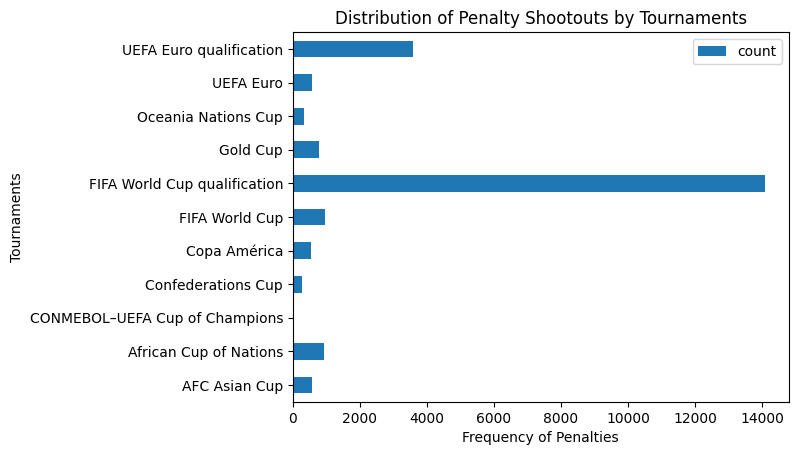

In [134]:
subset.groupby('tournament')['penalty_shootout'].agg(['count']).plot(kind='barh')
plt.title('Distribution of Penalty Shootouts by Tournaments')
plt.ylabel('Tournaments')
plt.xlabel('Frequency of Penalties')

In [97]:
subset['total_score'] = subset['home_score'] + subset['away_score']

In [98]:
subset.head()

In [111]:
subset['total_score'].describe()

Text(0.5, 1.0, 'Distribution of Total Goals')

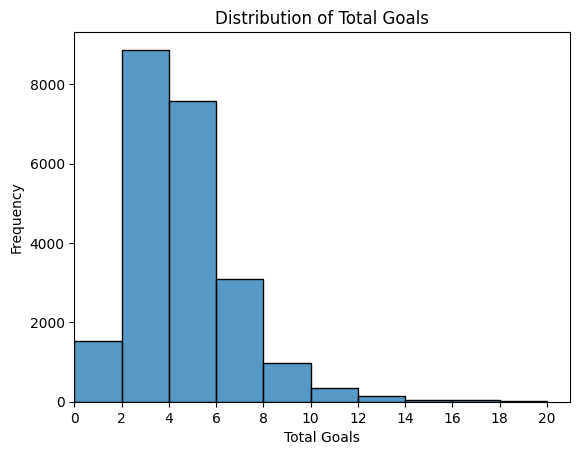

In [110]:
sns.histplot(subset['total_score'],bins=bin_edges)
plt.xticks(bin_edges)
plt.xlim(left=0)
plt.xlabel('Total Goals')
plt.ylabel('Frequency')
plt.title('Distribution of Total Goals')